<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20255/Assignment%204/CMPE_255_Hierachical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Clustering Assignment : Hierachical Clustering

## Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
wine_data=load_wine()
data = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
X= data.values
y= wine_data.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X.shape

(178, 13)

## Data Transforming

In [5]:
from sklearn.preprocessing import normalize

data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [6]:
pca = PCA(2)
  
#Transform the data
X_tranformed = pca.fit_transform(data_scaled)

## Hierachical Clustering

Steps to perform Hierarchical Clustering:

Step 1. Assign each of these points to a separate cluster.

Step 2. Based on the similarity of these clusters, combine the most similar clusters together and repeating the process until only a single cluster is left.


In [7]:
import sklearn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

**Draw dendogram to know the number of clusters required**

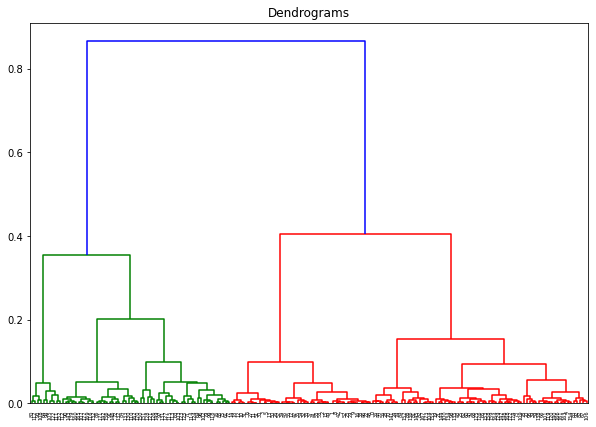

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_tranformed, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples.

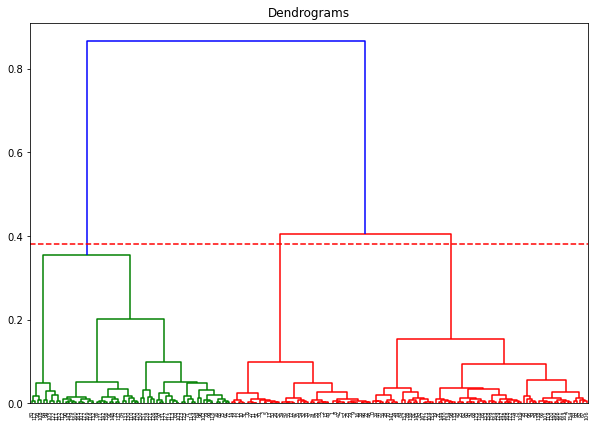

In [35]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_tranformed, method='ward'))
plt.axhline(y=0.38, color='r', linestyle='--')

### Single Linkage

In [26]:
from sklearn.cluster import AgglomerativeClustering

cluster_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
cluster_single.fit_predict(X_tranformed)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

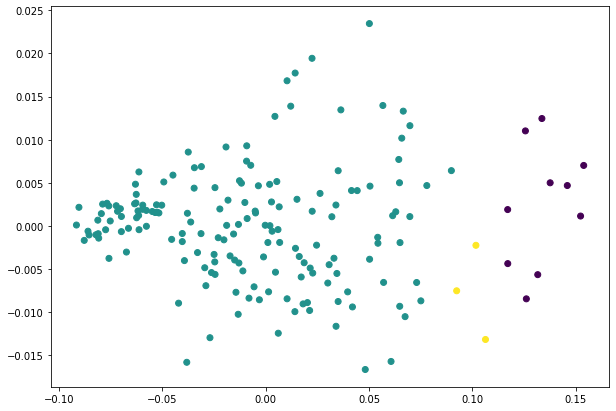

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_tranformed[:,0], X_tranformed[:,1], c=cluster_single.labels_)

### Complete Linkage

In [30]:
cluster_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster_complete.fit_predict(X_tranformed)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

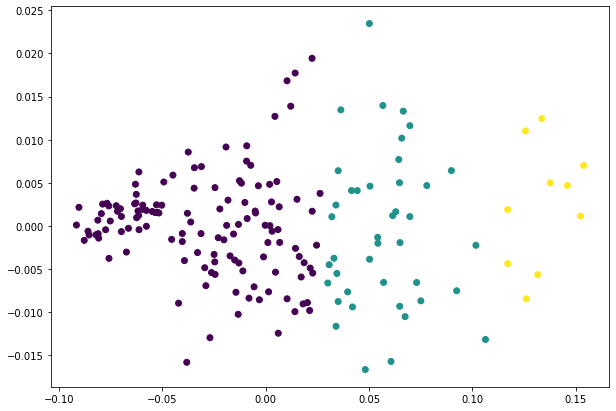

In [32]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_tranformed[:,0], X_tranformed[:,1], c=cluster_complete.labels_)

### Average Linkage

In [33]:
cluster_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
cluster_average.fit_predict(X_tranformed)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

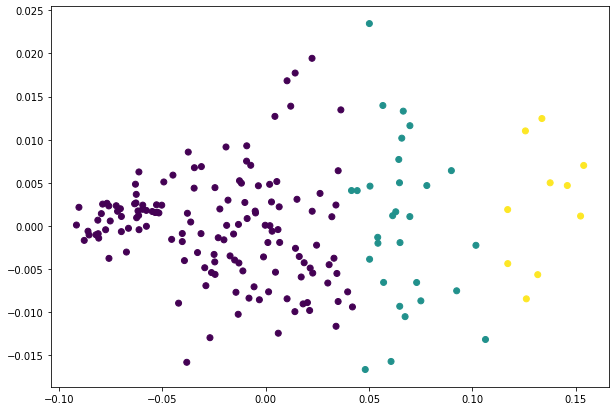

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(X_tranformed[:,0], X_tranformed[:,1], c=cluster_average.labels_)